<a href="https://colab.research.google.com/github/Guykashi/DL-Project-Steph-and-Klay-CNN./blob/main/DL_Project__Steph%26Klay_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [13]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import imghdr

In [14]:
#import directory from my desktop
from zipfile import ZipFile
data = 'data.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()

In [15]:
data_dir = 'data'

In [16]:
#two folders inside my data directory named steph and klay
os.listdir(data_dir)

['klay', 'steph']

**cleaning the folders from bad images**

In [17]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [18]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list data/klay/klaythompson-6.jpg
Image not in ext list data/klay/07cb72c471b08ffec9e3138fc933c1e2.png
Image not in ext list data/klay/skysports-klay-thompson-golden-state-warriors_5662372.jpg
Image not in ext list data/klay/skysports-klay-thompson-golden-state_5636386.jpg
Image not in ext list data/klay/12d14-16439030718997-1920.jpg
Image not in ext list data/steph/skysports-stephen-curry-golden-state-warriors_5714106.jpg
Image not in ext list data/steph/skysports-ap-steph-curry-golden-state-warriors_5394338.jpg


**Loading Data**

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 293 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
batch = data_iterator.next()

In [22]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
#labels (steph=1 and klay=0)
batch[1]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

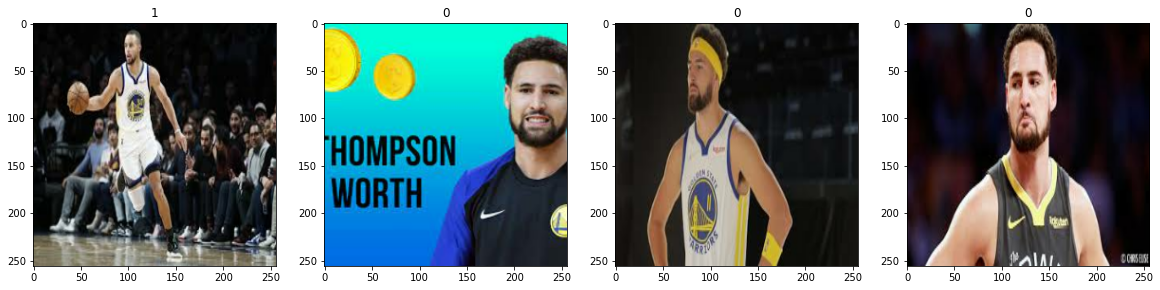

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**Scale the data**

In [25]:
#normalize
data = data.map(lambda x,y: (x/255,y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[1.56862754e-02, 1.56862754e-02, 2.35294122e-02],
          [1.96078438e-02, 1.96078438e-02, 2.74509806e-02],
          [1.26302084e-02, 1.26302084e-02, 1.26302084e-02],
          ...,
          [5.96890301e-02, 4.78707114e-03, 0.00000000e+00],
          [6.27451017e-02, 7.84313772e-03, 0.00000000e+00],
          [5.38526364e-02, 6.79381145e-03, 6.79381145e-03]],
 
         [[1.96078438e-02, 1.85867455e-02, 2.94931754e-02],
          [1.56020224e-02, 1.56020224e-02, 2.34451592e-02],
          [1.26302084e-02, 1.26302084e-02, 1.26302084e-02],
          ...,
          [5.48177101e-02, 1.17647061e-02, 8.42524532e-05],
          [5.48177101e-02, 1.17647061e-02, 8.42524532e-05],
          [4.69669104e-02, 2.87224259e-03, 2.87224259e-03]],
 
         [[2.05652565e-02, 1.66436881e-02, 3.62515301e-02],
          [1.13773569e-02, 1.13773569e-02, 1.92204937e-02],
          [1.26302084e-02, 1.26302084e-02, 1.55254286e-02],
          ...,
          [4.84046638e-02, 1.20841982e-02, 2.7934

**Split the data**

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**Building the model**

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**Train the model**

In [1]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 21s 3s/step - loss: 0.7036 - accuracy: 0.5134 - val_loss: 0.6750 - val_accuracy: 0.7344
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.6347 - accuracy: 0.6518 - val_loss: 0.5771 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.6110 - accuracy: 0.6384 - val_loss: 0.5785 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 14s 2s/step - loss: 0.5013 - accuracy: 0.7991 - val_loss: 0.3625 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.3888 - accuracy: 0.8616 - val_loss: 0.2711 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.2918 - accuracy: 0.8884 - val_loss: 0.2094 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 16s 2s/step - loss: 0.1615 - accuracy: 0.9464 - val_loss: 0.1207 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

**Plot performance**

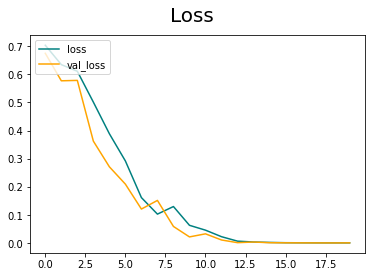

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

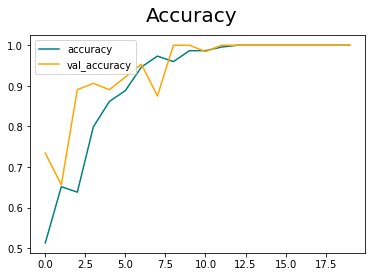

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate**

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
